# MSDS 432, Assignment 3 - Recursion

#### Author: Brandon Moretz

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time

In [3]:
np.random.seed(323) # static seed so results are reproducible

## Factoral Algorithms

In [19]:
def factoral_recursive(n):
    """Recursive version of Factoral (n!)"""
    if n == 1:
        return 1
    else:
        return n * factoral_recursive(n-1)
    
def factoral_iterative(n):
    """Iterative version of Factoral (n!)"""
    result = 1
    for i in range(n, 1, -1):
        result *= i
    return result

def profile(func):
    """Utility function to help profile the runtime of code blocks."""
    start_time = time()
    func()
    return time() - start_time

## Benchmark

In [18]:
# Create the output metrics DataFrame
results = pd.DataFrame(columns = ['Length', 'Recursive', 'Iterative'])

In [20]:
dataset = [ int(np.random.uniform(2000, 2900)) for k in range(0, 10)] # increased the numeric range due to getting all zeros.
dataset.sort() # order from largest to smallest for charting

for index in range(len(dataset)): # iterate the dataset
    n = dataset[index]
    recursive_time = profile(lambda: factoral_recursive(n)) # profile recursive version
    iterative_time = profile(lambda: factoral_iterative(n)) # profile iterative version
    
    assert factoral_recursive(n) == factoral_iterative(n) # ensure the two version return the same result.
    
    results.loc[index] = [n, recursive_time, iterative_time] # save it.

## Results

In [21]:
results # display the results table / DataFrame

,Length,Recursive,Iterative
0,2133.0,0.001032,0.000971
1,2240.0,0.001974,0.001029
2,2309.0,0.002000,0.001002
3,2392.0,0.000999,0.002000
4,2399.0,0.002000,0.000975
5,2447.0,0.000976,0.001027
6,2511.0,0.002000,0.001000
7,2625.0,0.002028,0.000970
8,2717.0,0.001978,0.002022
9,2747.0,0.002000,0.001000


## Summary

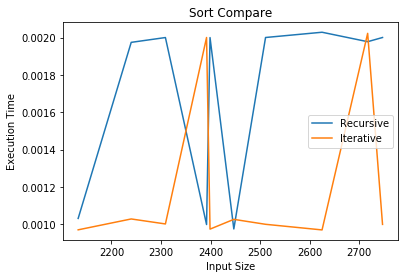

In [22]:
# Chart the relevant metrics about the three algorithms in comparision.
ax = results[['Length', 'Recursive', 'Iterative']].plot.line(x='Length', title='Sort Compare')
ax.set_xlabel('Input Size')
ax.set_ylabel('Execution Time')
plt.show()